In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms

### Collect data

In [4]:
DATASET_ID = 'BIRD_DB_Vireo_cassinii'

In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

In [6]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'cassins.pickle'

In [7]:
syllable_df = pd.read_pickle(df_loc)

In [8]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,subject_importance,key,audio,rate,spectrogram
0,9.842790,10.105938,ah,ORA,0,Primary subject,2014-05-29_10-10-00-000000,"[-0.19927763130383222, -0.2129138251615996, -0...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3059005, 0.4..."
1,72.031245,72.346332,ah,ORA,0,Primary subject,2014-05-29_10-10-00-000000,"[-0.12207342570633199, -0.09996911527363203, -...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.12574787, 0.12236..."
2,74.130176,74.376012,bz,ORA,0,Primary subject,2014-05-29_10-10-00-000000,"[-0.0889848557398444, -0.06770700742932487, -0...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2822944, 0.0..."


In [9]:
len(syllable_df)

67032

Text(0.5, 1.0, 'min')

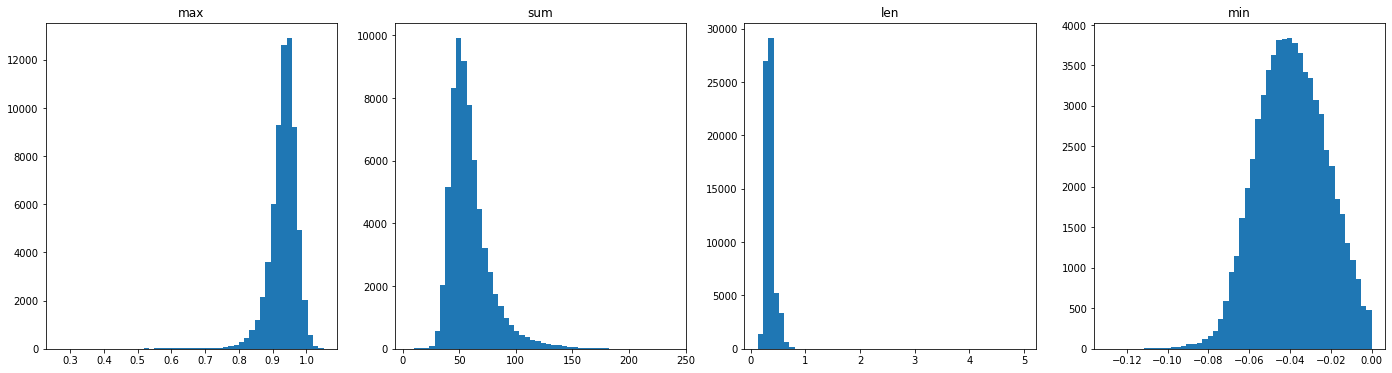

In [10]:
fig, axs = plt.subplots(ncols=4, figsize=(24,6))
axs[0].hist([np.max(i) for i in syllable_df.spectrogram.values], bins=50);axs[0].set_title('max')
axs[1].hist([np.sum(i) for i in syllable_df.spectrogram.values], bins=50);axs[1].set_title('sum')
axs[2].hist((syllable_df.end_time - syllable_df.start_time).values, bins = 50); axs[2].set_title('len')
axs[3].hist([np.min(i) for i in syllable_df.spectrogram.values], bins=50);axs[3].set_title('min')

### cluster

In [11]:
len(syllable_df)

67032

In [12]:
specs = list(syllable_df.spectrogram.values)
specs = [i / np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(67032, 992)

In [13]:
fit = umap.UMAP(min_dist=0.25)

In [14]:
np.shape(specs_flattened)

(67032, 992)

In [15]:
z  = list(fit.fit_transform(specs_flattened))

/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../

In [16]:
z = np.vstack(z)

### variation across populations

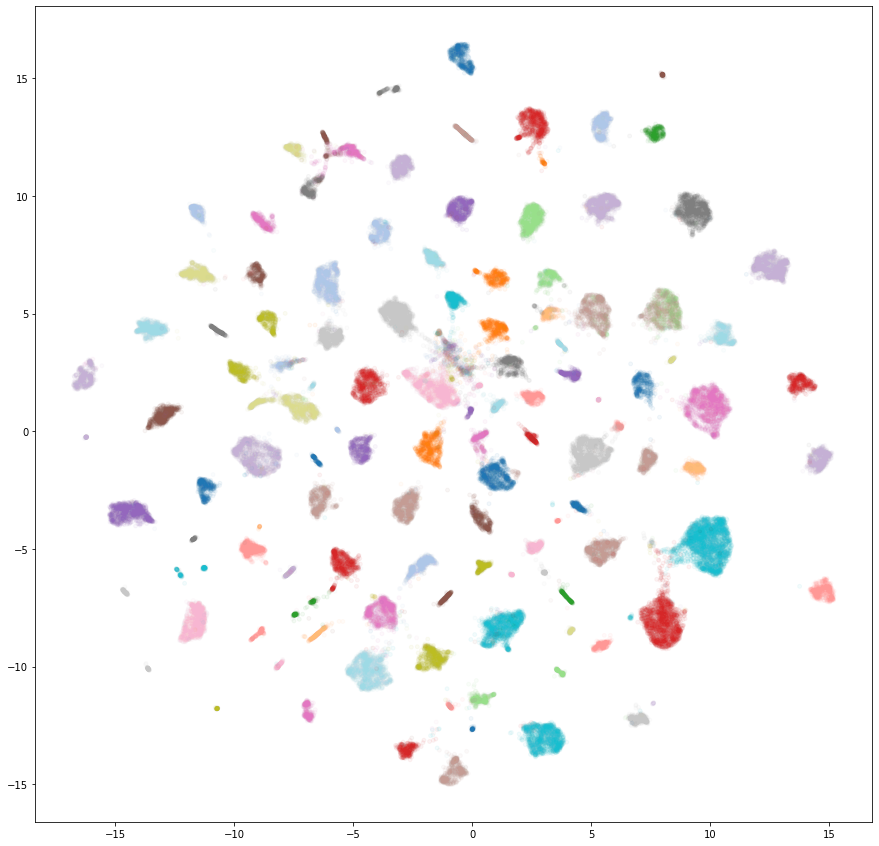

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_projections(projection=z, alpha=0.05, labels = syllable_df.labels.values, s=15, ax = ax, show_legend=False)
#ax.set_xlim([-15,15])
#ax.set_ylim([-15,15])
plt.show()

In [18]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [ ]:
alpha=0.05, labels = syllable_df.labels.values, s=15

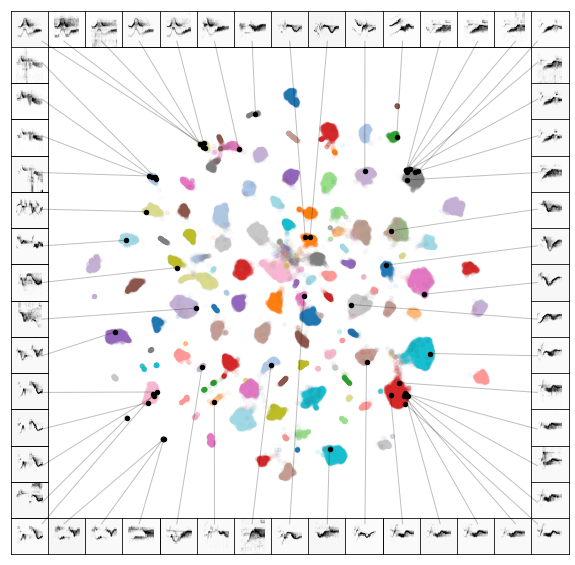

In [29]:
scatter_spec(
    z,
    specs,
    column_size=15,
    color_points=False,
    enlarge_points=20,
    figsize=(10, 10),
    scatter_kwargs = {
        'labels': syllable_df.labels.values,
        'alpha':0.05,
        's': 15,
        'show_legend': False,
        'color_palette': 'tab20'
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':1,
        'ls':"solid",
        'alpha':0.25,
    },
    draw_lines=True
);
#save_fig(FIGURE_DIR / 'cassins', dpi=300, save_jpg=True)

#### individuals by call type

In [38]:
syllable_df[:3]

,start_time,end_time,indv,indvi,vocalization_type,key,audio,rate,spectrogram
0,0.0,0.090907,BlaBla0506,0,Te,BlaBla0506_110302-TetC-12,"[-0.00010242089339890763, -0.00057870499781021...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.0,0.063991,GraGra0201,0,Th,GraGra0201_110907-ThuckC-38,"[-6.724604112049491e-05, -0.000377366215625527...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.0,0.094535,GreRas2400,0,Te,GreRas2400_110615_TetC-07,"[-4.552039706618117e-05, -0.000208463210248830...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [40]:
call_df = syllable_df[syllable_df.vocalization_type == 'DC']

In [52]:
{i:np.sum(call_df.indv == i) for i in call_df.indv.unique()}

{'BluRas07dd': 27,
 'YelOra2575': 47,
 'BlaBla0506': 21,
 'GreGre6364': 14,
 'WhiLbl0010': 26,
 'WhiBlu5698': 12,
 'WhiGra0114': 8,
 'BlaLbl8026': 25,
 'LblRed0613': 36,
 'BluRas61dd': 35,
 'RedRas3600': 10,
 'GraLbl0457': 26,
 'WhiWhi1415': 5,
 'GreOra1817': 24,
 'GraGra0201': 41,
 'YelGre5275': 38,
 'WhiRas44dd': 30,
 'LblBla4419': 40,
 'GreWhi1242': 3,
 'LblBla4548': 44,
 'HPiHPi4748': 29,
 'WhiBlu4818': 5,
 'PurRas20dd': 28,
 'WhiBlu4917': 9,
 'GreRas2400': 2}

In [60]:
indvs_to_include = [i for i in call_df.indv.unique() if np.sum(call_df.indv == i) > 15]

In [61]:
call_df = call_df[call_df.indv.isin(indvs_to_include)]

In [62]:
specs = list(call_df.spectrogram.values)
specs = [i / np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(517, 1120)

In [63]:
fit = umap.UMAP(min_dist=0.25)

In [64]:
np.shape(specs_flattened)

(517, 1120)

In [65]:
z  = list(fit.fit_transform(specs_flattened))

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [66]:
z = np.vstack(z)

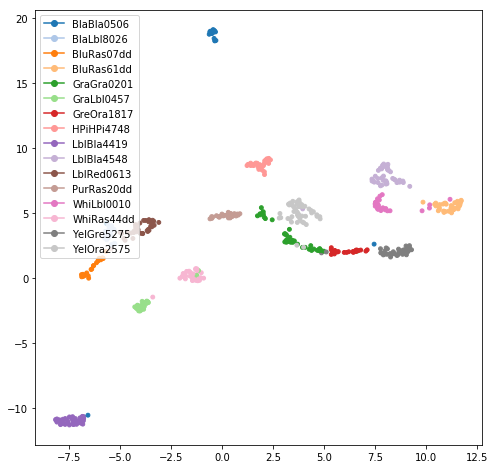

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
scatter_projections(projection=z, alpha=1, labels = call_df.indv.values, s=15, ax = ax)
#ax.set_xlim([-15,15])
#ax.set_ylim([-15,15])
plt.show()

#### individuals by call type

In [68]:
syllable_df[:3]

,start_time,end_time,indv,indvi,vocalization_type,key,audio,rate,spectrogram
0,0.0,0.090907,BlaBla0506,0,Te,BlaBla0506_110302-TetC-12,"[-0.00010242089339890763, -0.00057870499781021...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.0,0.063991,GraGra0201,0,Th,GraGra0201_110907-ThuckC-38,"[-6.724604112049491e-05, -0.000377366215625527...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.0,0.094535,GreRas2400,0,Te,GreRas2400_110615_TetC-07,"[-4.552039706618117e-05, -0.000208463210248830...",44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [69]:
call_df = syllable_df[syllable_df.vocalization_type == 'Te']

In [70]:
{i:np.sum(call_df.indv == i) for i in call_df.indv.unique()}

{'BlaBla0506': 13,
 'GreRas2400': 34,
 'WhiBlu5698': 17,
 'WhiBlu4917': 17,
 'WhiRas44dd': 30,
 'WhiLbl0010': 27,
 'GreGre6364': 29,
 'BlaLbl8026': 15,
 'GraGra0201': 35,
 'YelOra2575': 29,
 'GreOra1817': 23,
 'WhiWhi1415': 23,
 'GreWhi1242': 26,
 'WhiBlu4818': 18,
 'PurRas20dd': 30,
 'HPiHPi4748': 30,
 'YelGre5275': 33,
 'LblRed0613': 28,
 'GreGre2522': 34,
 'LblBla4548': 37,
 'GraLbl0457': 24,
 'BluRas61dd': 30,
 'BluRas07dd': 22,
 'WhiGra0114': 9}

In [71]:
indvs_to_include = [i for i in call_df.indv.unique() if np.sum(call_df.indv == i) > 15]

In [72]:
call_df = call_df[call_df.indv.isin(indvs_to_include)]

In [73]:
specs = list(call_df.spectrogram.values)
specs = [i / np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(576, 1120)

In [74]:
fit = umap.UMAP(min_dist=0.25)

In [75]:
np.shape(specs_flattened)

(576, 1120)

In [76]:
z  = list(fit.fit_transform(specs_flattened))

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [77]:
z = np.vstack(z)

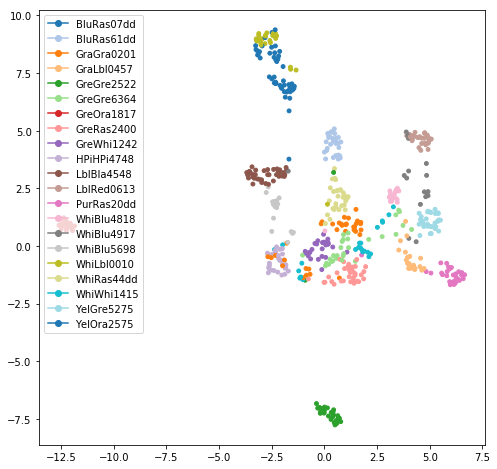

In [78]:
fig, ax = plt.subplots(figsize=(8,8))
scatter_projections(projection=z, alpha=1, labels = call_df.indv.values, s=15, ax = ax)
#ax.set_xlim([-15,15])
#ax.set_ylim([-15,15])
plt.show()